# Photic Zone: CTD and other low data rate sensors


The 'photic zone' is the upper layer of the ocean regularly illuminated by sunlight. This set of photic zone 
notebooks concerns sensor data from the surface to about 200 meters depth. Data are acquired from two to nine
times per day by shallow profilers. This notebook covers CTD (salinity 
and temperature), dissolved oxygen, nitrate, pH, spectral irradiance, fluorometry and photosynthetically 
available radiation (PAR).  


Data are first taken from the Regional Cabled Array shallow profilers and platforms. A word of explanation here: The
profilers rise and then fall over the course of about 80 minutes, nine times per day, from a depth of 200 meters
to within about 10 meters of the surface. As the ascend and descend they record data. The resting location in
between these excursions is a platform 200 meters below the surface that is anchored to the see floor. The platform
also carries sensors that measure basic ocean water properties.


<BR>
<img src="./images/vessels/revelle.jpg" style="float: left;" alt="ship and iceberg photo" width="900"/>
<div style="clear: left"><BR>


Research ship Revelle in the southern ocean: 100 meters in length. 
Note: Ninety percent of this iceberg is beneath the surface. 


More on the Regional Cabled Array oceanography program [here](https://interactiveoceans.washington.edu).
    
    
### Study site locations
    

We begin with three sites in the northeast Pacific: 
    

```
Site name               Lat               Lon
------------------      ---               ---
Oregon Offshore         44.37415          -124.95648
Oregon Slope Base       44.52897          -125.38966 
Axial Base              45.83049          -129.75326
```   


In [19]:
import os, sys, time, glob, warnings
from IPython.display import clear_output             # use inside loop with clear_output(wait = True) followed by print(i)
warnings.filterwarnings('ignore')
this_dir = os.getcwd()
data_dir = this_dir + '/../data'

from matplotlib import pyplot as plt
from matplotlib import colors as mplcolors
import numpy as np, pandas as pd, xarray as xr
from numpy import datetime64 as dt64, timedelta64 as td64

# convenience functions abbreviating 'datetime64' and so on
def doy(theDatetime): return 1 + int((theDatetime - dt64(str(theDatetime)[0:4] + '-01-01')) / td64(1, 'D'))
def dt64_from_doy(year, doy): return dt64(str(year) + '-01-01') + td64(doy-1, 'D')
def day_of_month_to_string(d): return str(d) if d > 9 else '0' + str(d)

print('\nJupyter Notebook running Python {}'.format(sys.version_info[0]))


Jupyter Notebook running Python 3


## CTD including Dissolved Oxygen

In [2]:
osb_ctd_nc_file = "./data/rca/ctd/osb_ctd_jan2019_1min.nc"
ds_CTD = xr.open_dataset(osb_ctd_nc_file)
ds_CTD

<xarray.Dataset>
Dimensions:                     (time: 44640)
Coordinates:
  * time                        (time) datetime64[ns] 2019-01-01 ... 2019-01-...
Data variables:
    seawater_temperature        (time) float64 ...
    seawater_pressure           (time) float64 ...
    practical_salinity          (time) float64 ...
    corrected_dissolved_oxygen  (time) float64 ...
    density                     (time) float64 ...
Attributes:
    node:                SF01A
    id:                  RS01SBPS-SF01A-2A-CTDPFA102-streamed-ctdpf_sbe43_sample
    geospatial_lat_min:  44.52897
    geospatial_lon_min:  -125.38966

...


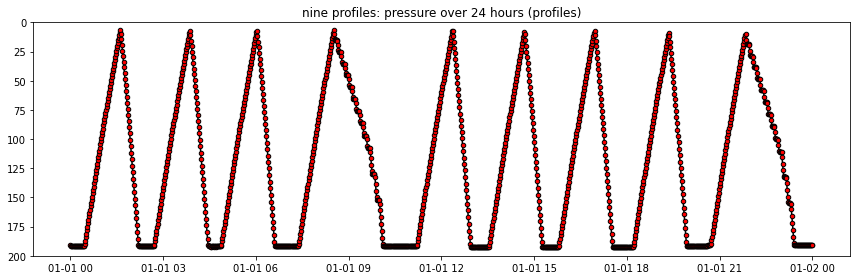

In [3]:
time0 = dt64('2019-01-01')
time1 = dt64('2019-01-02')
ds_CTD_time_slice = ds_CTD.sel(time=slice(time0, time1))    # one day
fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)
axs.plot(ds_CTD_time_slice.time, ds_CTD_time_slice.seawater_pressure, \
            marker='.', markersize=9., color='k', markerfacecolor='r')
axs.set(ylim = (200., 0.), title='nine profiles: pressure over 24 hours (profiles)')
print('...')

...


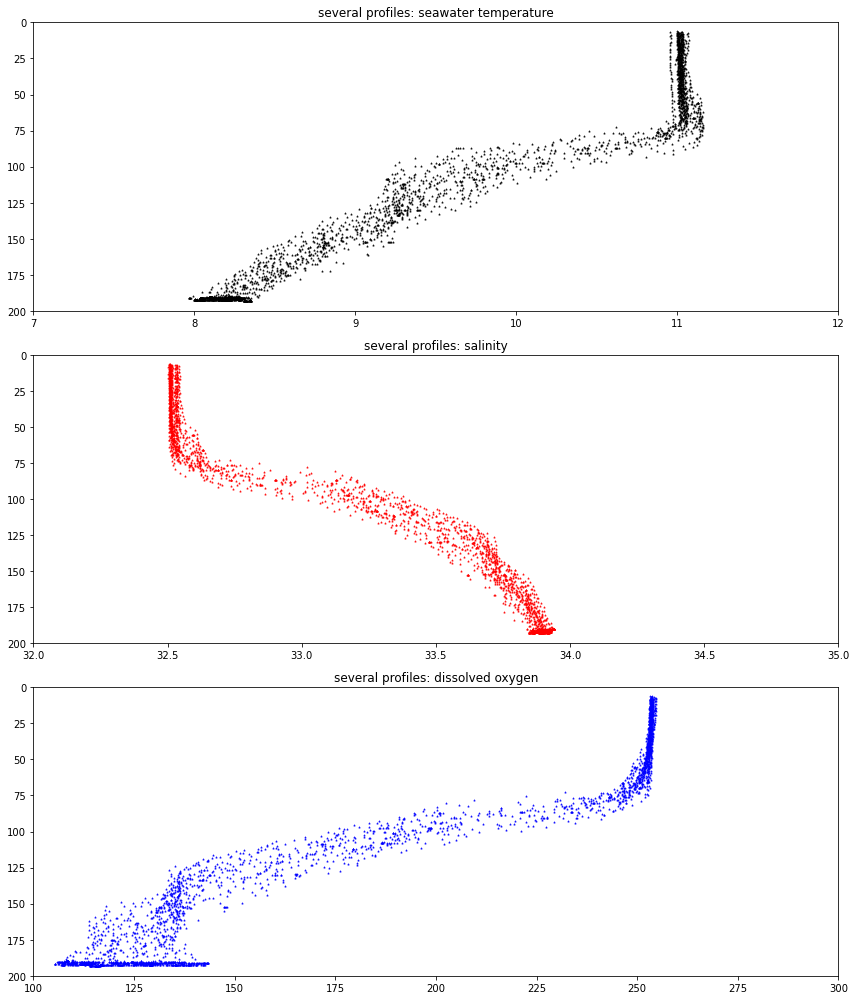

In [4]:
# this is one approach to time bounding: Grab n days out of a longer dataset (n = 3 for example)
# contrasting idea: See the nitrate section where profiles are staggered
day_of_month_start = '25'
day_of_month_end = '27'
time0 = dt64('2019-01-' + day_of_month_start)
time1 = dt64('2019-01-' + day_of_month_end)

temperature_upper_bound = 12.
temperature_lower_bound = 7.
salinity_upper_bound = 35.
salinity_lower_bound = 32.
dissolved_oxygen_upper_bound = 300
dissolved_oxygen_lower_bound = 100

ds_CTD_time_slice = ds_CTD.sel(time=slice(time0, time1))

fig, axs = plt.subplots(3,1,figsize=(12,14), tight_layout=True)
axs[0].scatter(ds_CTD_time_slice.seawater_temperature, ds_CTD_time_slice.seawater_pressure, marker='^', s = 1., color='k')
axs[0].set(xlim = (temperature_lower_bound, temperature_upper_bound), \
        ylim = (200., 0.), title='several profiles: seawater temperature')
axs[1].scatter(ds_CTD_time_slice.practical_salinity, \
            ds_CTD_time_slice.seawater_pressure, marker='^', s = 1., color='r')
axs[1].set(xlim = (salinity_lower_bound, salinity_upper_bound), \
        ylim = (200., 0.), title='several profiles: salinity')
axs[2].scatter(ds_CTD_time_slice.corrected_dissolved_oxygen, \
            ds_CTD_time_slice.seawater_pressure, marker='^', s = 1., color='b')
axs[2].set(xlim = (dissolved_oxygen_lower_bound, dissolved_oxygen_upper_bound), \
        ylim = (200., 0.), title='several profiles: dissolved oxygen')
print('...')

## pCO2

This seems to be only 2600 observations from June 23 to September 27, 2019. 
These data are otherwise dubious as well. 
No charting attempted.

In [5]:
# pCO2_source = '/data/rca/pCO2/'
# pCO2_data = 'depl*PCO2*.nc'
# ds_pCO2 = xr.open_mfdataset(pCO2_source + pCO2_data)   # example of multi-file
# ds_pCO2

In [6]:
# print('pCO2 time range: ' + str(ds_pCO2.time[0].values) + ' to ' + str(ds_pCO2.time[-1].values))
#
# produces:
#
# pCO2 time range: 2019-06-23T06:35:03.680657408 to 2019-09-27T17:35:22.647006208

## Nitrate


This dataset for January 2019 includes 30 days of 31; but also falls over on Jan 16 and 17.
There is some corresponding hard-coding. There are two profiles per day -- on at midnight,
one at noon -- and these are charted all at once using a shift-per-day approach.

In [7]:
nitrate_source = './data/rca/nitrate/'
nitrate_data_midnight = 'nc_midn_2019_01.nc'
nitrate_data_noon     = 'nc_noon_2019_01.nc'

ds_nitrate_midn = xr.load_dataset(nitrate_source + nitrate_data_midnight)
ds_nitrate_noon = xr.load_dataset(nitrate_source + nitrate_data_noon)

ds_nitrate_midn

<xarray.Dataset>
Dimensions:                (doy: 30, int_ctd_pressure_bins: 800)
Coordinates:
  * int_ctd_pressure_bins  (int_ctd_pressure_bins) float64 0.125 0.375 ... 199.9
  * doy                    (doy) int64 1 2 3 4 5 6 7 8 ... 25 26 27 28 29 30 31
Data variables:
    nitrate_concentration  (int_ctd_pressure_bins, doy) float32 nan nan ... nan

...


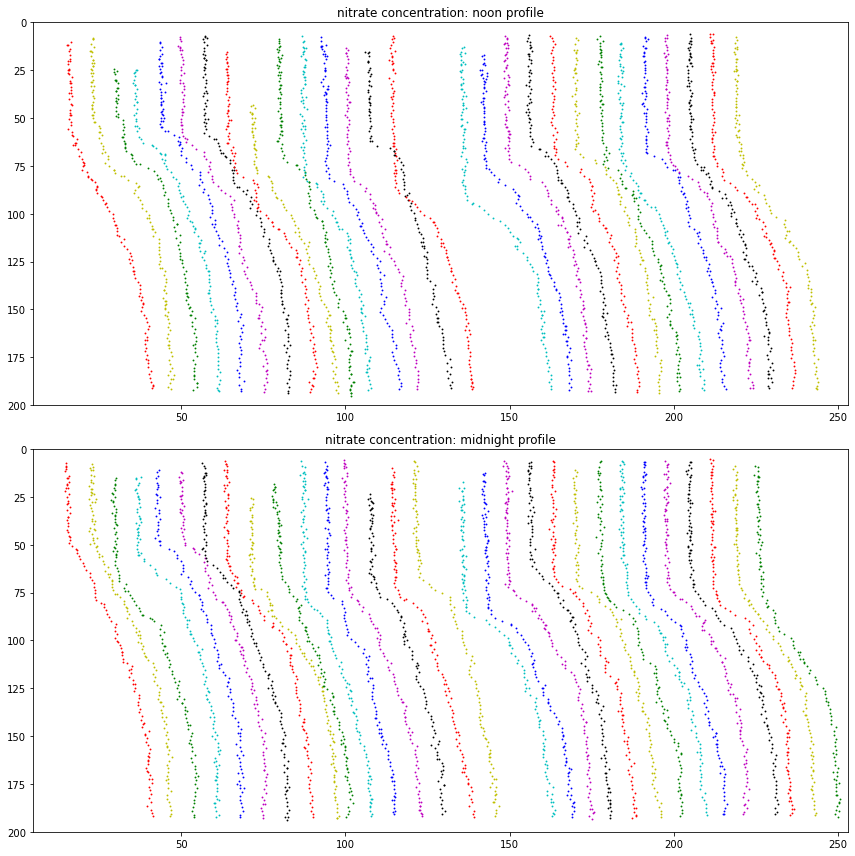

In [8]:
# to do: auto-detect the data fails on doy 16, 17, 31 rather than hardcode exceptions
#     try: f = ds_nitrate_noon.nitrate_concentration.sel(doy=16)
#     except: print('16 bad')
# to do: print day of month adjacent to profile; verify noon - midn colors match for corresp doy 

nProfiles = 30
profile_shift = 7
colorwheel = ['k', 'r', 'y', 'g', 'c', 'b', 'm']
cwmod = len(colorwheel)
nitrate_upper_bound = 50 + (nProfiles - 1)*profile_shift
nitrate_lower_bound = 5
fig, axs = plt.subplots(2,1,figsize=(12,12), tight_layout=True)
for da_i in ds_nitrate_midn.doy:                # da_ means it is a data array
    i = int(da_i)                               # taking int(da) gives day of month as integer
    if not (i == 16 or i == 17 or i == 31):     # these three days fail to chart (harcoded; see to do)
        axs[0].scatter(ds_nitrate_noon.nitrate_concentration.sel(doy=i) + i*profile_shift, \
            ds_nitrate_noon.int_ctd_pressure_bins,  marker='.', s=3., color=colorwheel[i%cwmod]) 
        axs[0].set(xlim = (nitrate_lower_bound, nitrate_upper_bound), \
            ylim = (200., 0.), title='nitrate concentration: noon profile')
    axs[1].scatter(ds_nitrate_midn.nitrate_concentration.sel(doy=i)+i*profile_shift, \
        ds_nitrate_midn.int_ctd_pressure_bins,  marker='.', s=3., color=colorwheel[i%cwmod]) 
    axs[1].set(xlim = (nitrate_lower_bound, nitrate_upper_bound), \
        ylim = (200., 0.), title='nitrate concentration: midnight profile')
print('...')

## pH

As with nitrate above: pH is measured during two profiles each day (of nine possible). 

In [9]:
pH_source = './data/rca/pH/'
pH_data = 'osb_sp_phsen_2019.nc'
ds_pH = xr.open_dataset(pH_source + pH_data)
ds_pH

# This generates a pressure/time curtain plot; good in that it shows data dropouts
#   ...but better is to color it by pH, see to do
# ds_pH.int_ctd_pressure.plot()       
# sanity check: Is this profile data as we expect?

<xarray.Dataset>
Dimensions:           (time: 7711)
Coordinates:
  * time              (time) datetime64[ns] 2019-01-01T02:13:06.062041088 ......
    int_ctd_pressure  (time) float64 ...
Data variables:
    ph_seawater       (time) float64 ...
Attributes:
    node:                SF01A
    id:                  RS01SBPS-SF01A-2D-PHSENA101-streamed-phsen_data_record
    geospatial_lat_min:  44.52897
    geospatial_lon_min:  -125.38966

...


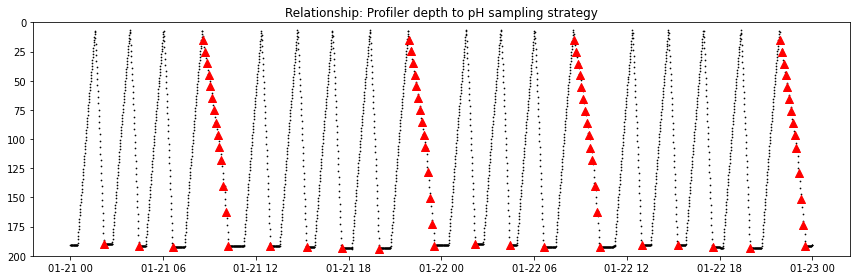

In [10]:
pH_temporary_time_start = '2019-01-21'
pH_temporary_time_end   = '2019-01-23'


ds_pH_temporary = ds_pH.sel(time=slice(dt64(pH_temporary_time_start), dt64(pH_temporary_time_end)))
ds_CTD_temporary = ds_CTD.sel(time=slice(dt64(pH_temporary_time_start), dt64(pH_temporary_time_end)))

fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)
axs.scatter(ds_CTD_temporary.time, ds_CTD_temporary.seawater_pressure, marker='.', s = 2., color='k')
axs.scatter(ds_pH_temporary.time, ds_pH_temporary.int_ctd_pressure, marker='^', s = 64., color='r')
axs.set(ylim = (200., 0.), title='Relationship: Profiler depth to pH sampling strategy')
print('...')

...


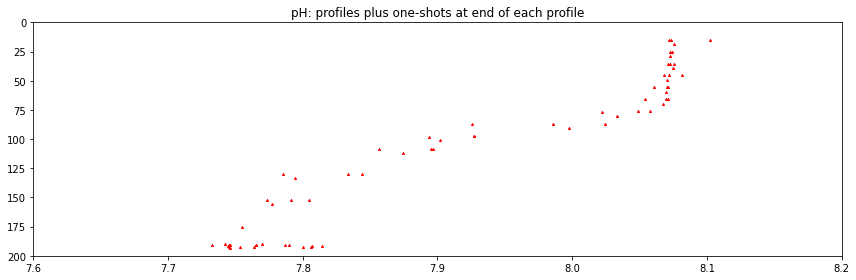

In [11]:
pH_lower_bound = 7.6
pH_upper_bound = 8.2
ds_pH_time_slice = ds_pH.sel(time=slice(time0, time1))
fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)
axs.scatter(ds_pH_time_slice.ph_seawater, \
            ds_pH_time_slice.int_ctd_pressure, \
            marker='^', s = 4., color='r')
axs.set(xlim = (pH_lower_bound, pH_upper_bound), \
        ylim = (200., 0.), title='pH: profiles plus one-shots at end of each profile')
print('...')

## Fluorometer

* Shallow profiler triplet: chlorophyll, cdom and scattering
    * Deep profilers are 2-channel
    * they operate continuously
* osb = Oregon Slope Base, SP = shallow profiler
* These data are resampled using mean() to one minute per sample

In [12]:
fluorometer_source = './data/rca/fluorescence/'
fluorometer_data = 'osb_sp_fluor_jan2019.nc'
ds_Fluorometer = xr.open_dataset(fluorometer_source + fluorometer_data)
ds_Fluorometer

<xarray.Dataset>
Dimensions:                              (time: 44640)
Coordinates:
  * time                                 (time) datetime64[ns] 2019-01-01 ......
Data variables:
    fluorometric_chlorophyll_a           (time) float64 ...
    fluorometric_cdom                    (time) float64 ...
    total_volume_scattering_coefficient  (time) float64 ...
    seawater_scattering_coefficient      (time) float64 ...
    optical_backscatter                  (time) float64 ...
    int_ctd_pressure                     (time) float64 ...
Attributes:
    node:                SF01A
    id:                  RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_re...
    geospatial_lat_min:  44.52897
    geospatial_lon_min:  -125.38966

...


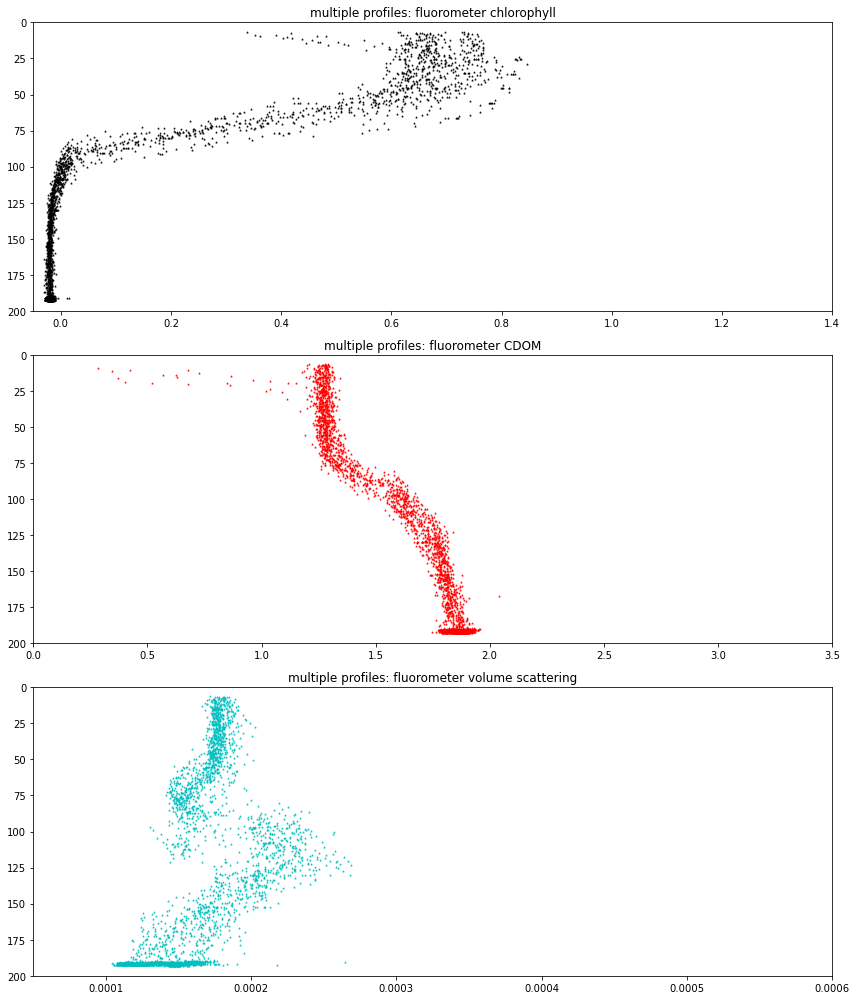

In [13]:
fluor_chlor_lower_bound = -.05
fluor_chlor_upper_bound = 1.4
fluor_cdom_lower_bound = 0.
fluor_cdom_upper_bound = 3.5
fluor_vscat_lower_bound = 0.00005
fluor_vscat_upper_bound = 0.0006

ds_Fluorometer_time_slice = ds_Fluorometer.sel(time=slice(time0, time1))

fig, axs = plt.subplots(3,1,figsize=(12,14), tight_layout=True)
axs[0].scatter(ds_Fluorometer_time_slice.fluorometric_chlorophyll_a, \
            ds_Fluorometer_time_slice.int_ctd_pressure, \
            marker='^', s = 1., color='k')
axs[1].scatter(ds_Fluorometer_time_slice.fluorometric_cdom, \
            ds_Fluorometer_time_slice.int_ctd_pressure, \
            marker='^', s = 1., color='r')
axs[2].scatter(ds_Fluorometer_time_slice.total_volume_scattering_coefficient, \
            ds_Fluorometer_time_slice.int_ctd_pressure, \
            marker='^', s = 1., color='c')
axs[0].set(xlim = (fluor_chlor_lower_bound, fluor_chlor_upper_bound), \
           ylim = (200., 0.), title='multiple profiles: fluorometer chlorophyll')
axs[1].set(xlim = (fluor_cdom_lower_bound, fluor_cdom_upper_bound), \
        ylim = (200., 0.), title='multiple profiles: fluorometer CDOM')
axs[2].set(xlim = (fluor_vscat_lower_bound, fluor_vscat_upper_bound), \
        ylim = (200., 0.), title='multiple profiles: fluorometer volume scattering')
print('...')

In [14]:
# fails
# run this to get a check of the units for chlorophyll 
# ds_flort.fluorometric_chlorophyll_a.units
# p = rca_ds_chlor.fluorometric_chlorophyll_a.plot() is an option as well
# by assigning the plot to p we have future ornamentation options

## Spectral Irradiance

* The data variable is `spkir_downwelling_vector` x 7 wavelengths per below
* 9 months continuous operation at about 4 samples per second gives 91 million samples
* DataSet includes `int_ctd_pressure` and `time` Coordinates; Dimensions are `spectra` (0--6) and `time`
* Oregon Slope Base `node : SF01A`, `id : RS01SBPS-SF01A-3D-SPKIRA101-streamed-spkir_data_record`
* Correct would be to plot these as a sequence of rainbow plots with depth, etc

See [Interactive Oceans](https://interactiveoceans.washington.edu/instruments/spectral-irradiance-sensor/): 


> The Spectral Irradiance sensor (Satlantic OCR-507 multispectral radiometer) measures the amount of 
> downwelling radiation (light energy) per unit area that reaches a surface. Radiation is measured 
> and reported separately for a series of seven wavelength bands (412, 443, 490, 510, 555, 620, 
> and 683 nm), each between 10-20 nm wide. These measurements depend on the natural illumination 
> conditions of sunlight and measure apparent optical properties. These measurements also are used 
> as proxy measurements of important biogeochemical variables in the ocean.
>
> Spectral Irradiance sensors are installed on the Science Pods on the Shallow Profiler Moorings 
> at Axial Base (SF01A), Slope Base (SF01A), and at the Endurance Array Offshore (SF01B) sites. 
> Instruments on the Cabled Array are provided by Satlantic – OCR-507. 


In [15]:
spectral_irradiance_source = './data/rca/irradiance/'
ds_irradiance = [xr.open_dataset(spectral_irradiance_source + 'osb_sp_irr_spec' + str(i) + '.nc') for i in range(7)]

...


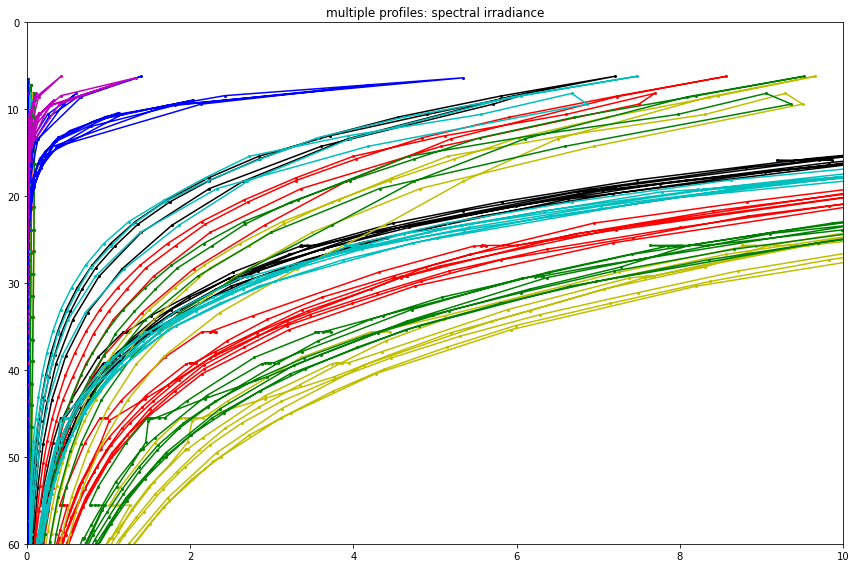

In [16]:
# Early attempt at using log crashed the kernel

spectral_irradiance_upper_bound = 10.
spectral_irradiance_lower_bound = 0.
ds_irr_time_slice = [ds_irradiance[i].sel(time = slice(time0, time1)) for i in range(7)]

fig, axs = plt.subplots(figsize=(12,8), tight_layout=True)
colorwheel = ['k', 'r', 'y', 'g', 'c', 'b', 'm']
for i in range(7):
    axs.plot(ds_irr_time_slice[i].spkir_downwelling_vector, \
                ds_irr_time_slice[i].int_ctd_pressure, marker='.', markersize = 4., color=colorwheel[i])
axs.set(xlim = (spectral_irradiance_lower_bound, spectral_irradiance_upper_bound), \
        ylim = (60., 0.), title='multiple profiles: spectral irradiance')
print('...')

## Photosynthetically Available Radiation

- Abbreviated PAR
- instrument string is *parad*
- Dubious claim: Can use to identify profile time ranges
    - Approximately from the PAR data and can be done very precisely using depth data
    - This suggests a derived dataset of profile start / peak / end times

In [17]:
par_source = './data/rca/par/'
par_data = 'osb_sp_par_jan2019.nc'
ds_PAR = xr.open_dataset(par_source + par_data)
ds_PAR

<xarray.Dataset>
Dimensions:            (time: 44640)
Coordinates:
  * time               (time) datetime64[ns] 2019-01-01 ... 2019-01-31T23:59:00
Data variables:
    par_counts_output  (time) float64 ...
    int_ctd_pressure   (time) float64 ...
Attributes:
    node:                SF01A
    id:                  RS01SBPS-SF01A-3C-PARADA101-streamed-parad_sa_sample
    geospatial_lat_min:  44.52897
    geospatial_lon_min:  -125.38966

...


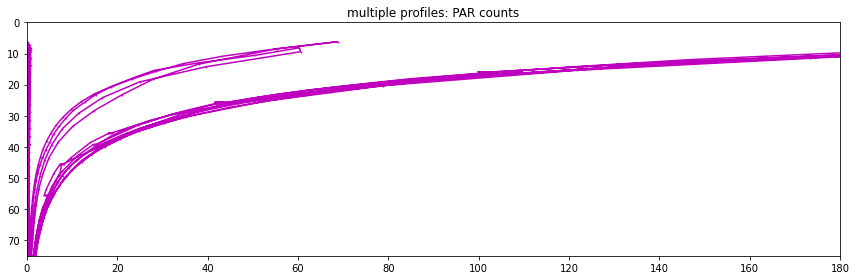

In [18]:
par_lower_bound = 0
par_upper_bound = 180
ds_PAR_time_slice = ds_PAR.sel(time=slice(time0, time1))
fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)
axs.plot(ds_PAR_time_slice.par_counts_output, ds_PAR_time_slice.int_ctd_pressure, marker='^', markersize = 1., color='m')
axs.set(xlim = (par_lower_bound, par_upper_bound), ylim = (75., 0.), title='multiple profiles: PAR counts')
print('...')